In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
math=pd.read_csv('math_e.csv', sep=';', quotechar='"', encoding='latin1')

In [3]:
math.head()

,Student ID,Student Country,Question ID,Type of Answer,Question Level,Topic,Subtopic,Keywords
0,647,Ireland,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
1,41,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
2,340,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
3,641,Italy,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
4,669,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."


In [4]:
math.describe()

,Student ID,Question ID,Type of Answer
count,9546.000000,9546.000000,9546.000000
mean,775.402263,478.912319,0.468259
std,460.590559,249.244061,0.499018
min,26.000000,77.000000,0.000000
25%,380.000000,323.000000,0.000000
50%,885.000000,428.000000,0.000000
75%,1219.000000,571.000000,1.000000
max,1565.000000,1549.000000,1.000000


In [5]:
math.isnull().sum()

Student ID         0
Student Country    0
Question ID        0
Type of Answer     0
Question Level     0
Topic              0
Subtopic           0
Keywords           0
dtype: int64

In [6]:
for col in math.columns:
    print(f'{col} --> {math[col].nunique()}')

Student ID --> 372
Student Country --> 8
Question ID --> 833
Type of Answer --> 2
Question Level --> 2
Topic --> 14
Subtopic --> 24
Keywords --> 365


In [7]:
math.groupby('Question Level')['Type of Answer'].describe()

,count,mean,std,min,25%,50%,75%,max
Question Level,,,,,,,,
Advanced,1702.0,0.501175,0.500146,0.0,0.0,1.0,1.0,1.0
Basic,7844.0,0.461117,0.498518,0.0,0.0,0.0,1.0,1.0


#### Answers are wrong more on the basic questions than the advanced. The difference is not that great but noticeable. Also there are almost 5 times more basic questions than advanced.

In [8]:
grouped = math.groupby(['Student Country', 'Question Level'])['Type of Answer'].agg(['sum', 'count'])

grouped['Percentage Correct'] = (grouped['sum'] / grouped['count']) * 100

result = grouped['Percentage Correct'].unstack()

result['Mean Percentage'] = result.mean(axis=1)

result = result.applymap(lambda x: f"{x:.2f}%" if not pd.isnull(x) else 'NaN')

print(result)

Question Level     Advanced   Basic Mean Percentage
Student Country                                    
Ireland              61.22%  43.03%          52.13%
Italy                58.92%  42.37%          50.64%
Lithuania            41.95%  43.96%          42.96%
Portugal             50.18%  44.13%          47.15%
Romania              60.71%  56.25%          58.48%
Russian Federation   34.62%  34.57%          34.59%
Slovenia             57.14%  68.85%          63.00%
Spain                   NaN  42.86%          42.86%


#### Country-wise, if speaking overall, Slovenian students has the highest percentage of Correct answers while Russian federation being the lowest. But if classified by question levels, it seems that solvenia has the most correction % in Basic questions while Ireland having the most in Advanced.

In [9]:
math.Topic.value_counts()

Topic
Linear Algebra                         5726
Fundamental Mathematics                 818
Complex Numbers                         592
Differentiation                         579
Analytic Geometry                       358
Statistics                              340
Numerical Methods                       310
Optimization                            182
Real Functions of a single variable     164
Integration                             144
Probability                             128
Differential Equations                  108
Graph Theory                             55
Set Theory                               42
Name: count, dtype: int64

#### Most of the questions are from 'Linear Algebra'.

In [10]:
def group_by(group,groupby):

    grouped = math.groupby(group)[groupby].agg(['sum', 'count'])

    grouped['Percentage Correct'] = (grouped['sum'] / grouped['count']) * 100

    result = grouped['Percentage Correct'].unstack()

    result['Mean Percentage'] = result.mean(axis=1)

    result_formatted = result.applymap(lambda x: f"{x:.2f}%" if not pd.isnull(x) else 'NaN')

    result['Mean Percentage'] = result['Mean Percentage']

    result_sorted = result.sort_values(by='Mean Percentage', ascending=False)

    result_sorted_formatted = result_sorted.applymap(lambda x: f"{x:.2f}%" if not pd.isnull(x) else 'NaN')

    return result_sorted_formatted

In [11]:
group_by(group=['Topic', 'Question Level'],groupby='Type of Answer')

Question Level,Advanced,Basic,Mean Percentage
Topic,,,
Set Theory,NaN,64.29%,64.29%
Graph Theory,75.00%,48.57%,61.79%
Differential Equations,50.00%,53.77%,51.89%
Linear Algebra,49.75%,48.83%,49.29%
Statistics,NaN,47.94%,47.94%
Fundamental Mathematics,49.21%,46.36%,47.78%
Complex Numbers,57.20%,35.98%,46.59%
Differentiation,60.00%,33.03%,46.52%
Analytic Geometry,34.00%,51.30%,42.65%


#### Students scores the most overall in 'Set theory' while the least in 'Optimization'. Basic 'Set Theory' seems like a good subject for scoring scores while advanced 'Optimization' are the hardest (although there were just 6 questions).

In [12]:
group_by(group=['Subtopic', 'Question Level'],groupby='Type of Answer')

Question Level,Advanced,Basic,Mean Percentage
Subtopic,,,
Definite Integrals,NaN,73.33%,73.33%
Eigenvalues and Eigenvectors,76.92%,51.92%,64.42%
Set Theory,NaN,64.29%,64.29%
Graph Theory,75.00%,48.57%,61.79%
Elementary Geometry,57.89%,58.80%,58.35%
Double Integration,NaN,55.56%,55.56%
Differential Equations,50.00%,53.77%,51.89%
Linear Transformations,54.65%,48.57%,51.61%
Partial Differentiation,71.43%,29.05%,50.24%


In [13]:
group_by(group=['Topic', 'Student Country'],groupby='Type of Answer')

Student Country,Ireland,Italy,Lithuania,Portugal,Romania,Russian Federation,Slovenia,Spain,Mean Percentage
Topic,,,,,,,,,
Set Theory,85.71%,NaN,52.38%,71.43%,NaN,NaN,NaN,NaN,69.84%
Differential Equations,NaN,NaN,71.43%,50.59%,NaN,NaN,NaN,62.50%,61.51%
Linear Algebra,61.70%,46.73%,42.88%,45.71%,58.97%,71.43%,68.74%,NaN,56.60%
Probability,34.78%,NaN,85.71%,34.69%,NaN,NaN,NaN,NaN,51.73%
Graph Theory,42.86%,NaN,67.65%,42.86%,NaN,NaN,NaN,NaN,51.12%
Integration,NaN,NaN,51.72%,42.61%,NaN,NaN,NaN,NaN,47.17%
Real Functions of a single variable,NaN,35.71%,71.43%,33.04%,NaN,NaN,NaN,NaN,46.73%
Statistics,41.18%,33.96%,50.00%,53.55%,NaN,NaN,NaN,NaN,44.67%
Numerical Methods,47.83%,51.06%,36.51%,33.12%,NaN,NaN,NaN,NaN,42.13%


#### In 'Set Theory', Ireland scored the most correct answers.
#### In 'Differential Equations', Lithuania scored the most correct answers.
#### In 'Linear Algebra', Russian Federation scored the most correct answers.
#### In 'Probability', Lithuania scored the most correct answers.
#### In 'Graph Theory', Lithuania scored the most correct answers.
#### In 'Integration', Lithuania scored the most correct answers.
#### In 'Real Functions of a single variable', Lithuania scored the most correct answers.
#### In 'Statistics', Portugal scored the most correct answers.
#### In 'Numerical Methods', Italy scored the most correct answers.
#### In 'Optimization', Italy scored the most correct answers.
#### In 'Differentiation', Romania scored the most correct answers.
#### In 'Complex Numbers', Italy scored the most correct answers.
#### In 'Fundamental Mathematics', Lithuania scored the most correct answers.
#### In 'Analytic Geometry', Portugal scored the most correct answers.

#### This also clears a interpretation where it seems Slovenia has the highest correction %, but only attended the 'Linear Algebra' portion. Whereas countries like Portugal or Lithuania who attended all the subjects had a lower %.

In [14]:
from kmodes.kmodes import KModes

In [15]:
math_mode=math.drop(['Student ID','Question ID','Keywords'],axis='columns')

In [16]:
math_mode.head()

,Student Country,Type of Answer,Question Level,Topic,Subtopic
0,Ireland,0,Basic,Statistics,Statistics
1,Portugal,1,Basic,Statistics,Statistics
2,Portugal,1,Basic,Statistics,Statistics
3,Italy,0,Basic,Statistics,Statistics
4,Portugal,1,Basic,Statistics,Statistics


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 20840.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 20840.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 20840.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 20840.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 20840.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1714, cost: 16370.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 556, cost: 16370.0
Init: initializing centroids
Init: initializing clusters
Starting iter

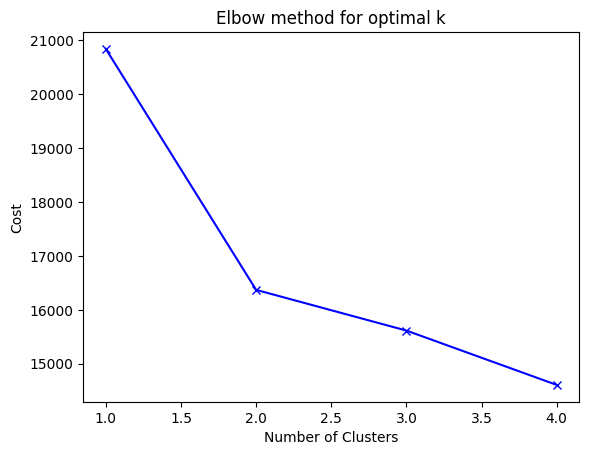

In [17]:
cost=[]
K=range(1,5)
for num_clusters in list(K):
    kmode=KModes(n_clusters=num_clusters,init='random',n_init=5,verbose=1)
    kmode.fit_predict(math_mode)
    cost.append(kmode.cost_)

plt.plot(K,cost,'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.title('Elbow method for optimal k')
plt.show()

In [18]:
kmode=KModes(n_clusters=2,init='random',n_init=5,verbose=1)
clusters=kmode.fit_predict(math_mode)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 791, cost: 19430.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 18474.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1001, cost: 19088.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2712, cost: 16574.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 547, cost: 16788.0
Best run was number 4


array([0, 1, 1, ..., 0, 1, 0], shape=(9546,), dtype=uint16)

In [19]:
math_clustered=math_mode.copy(deep=True)
math_clustered.insert(0,"Cluster",clusters,True)

In [20]:
math_clustered.head()

,Cluster,Student Country,Type of Answer,Question Level,Topic,Subtopic
0,0,Ireland,0,Basic,Statistics,Statistics
1,1,Portugal,1,Basic,Statistics,Statistics
2,1,Portugal,1,Basic,Statistics,Statistics
3,0,Italy,0,Basic,Statistics,Statistics
4,1,Portugal,1,Basic,Statistics,Statistics


In [21]:
math_clustered['Cluster'].value_counts()

Cluster
0    6351
1    3195
Name: count, dtype: int64

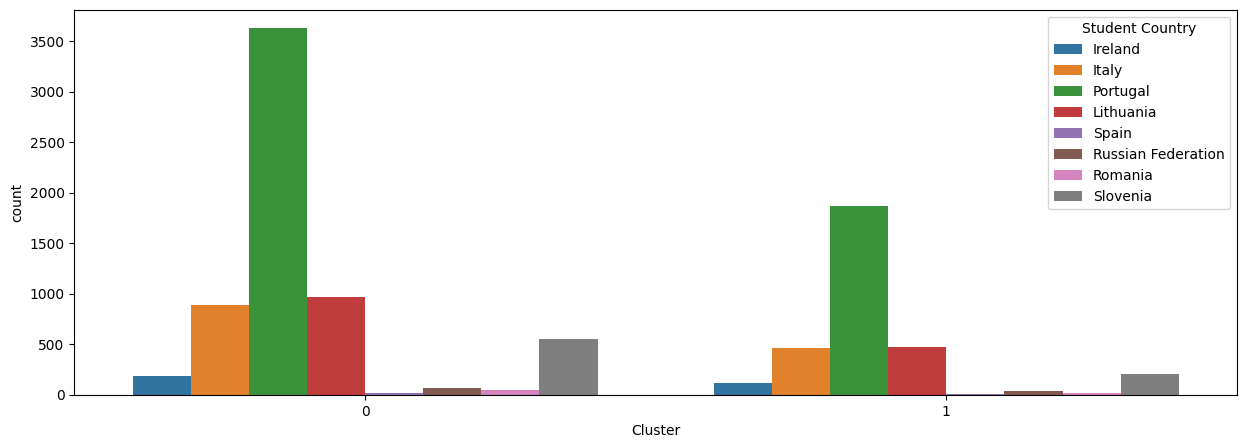

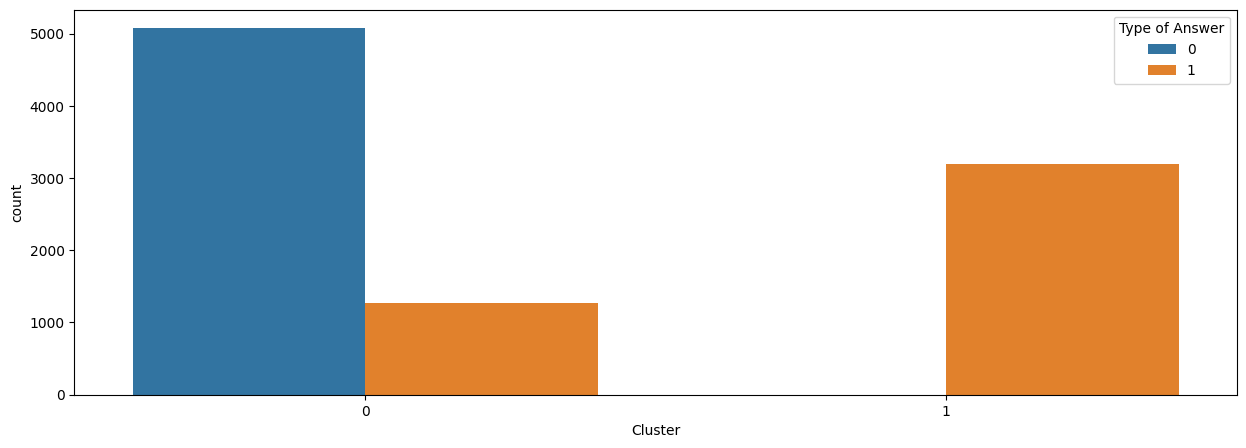

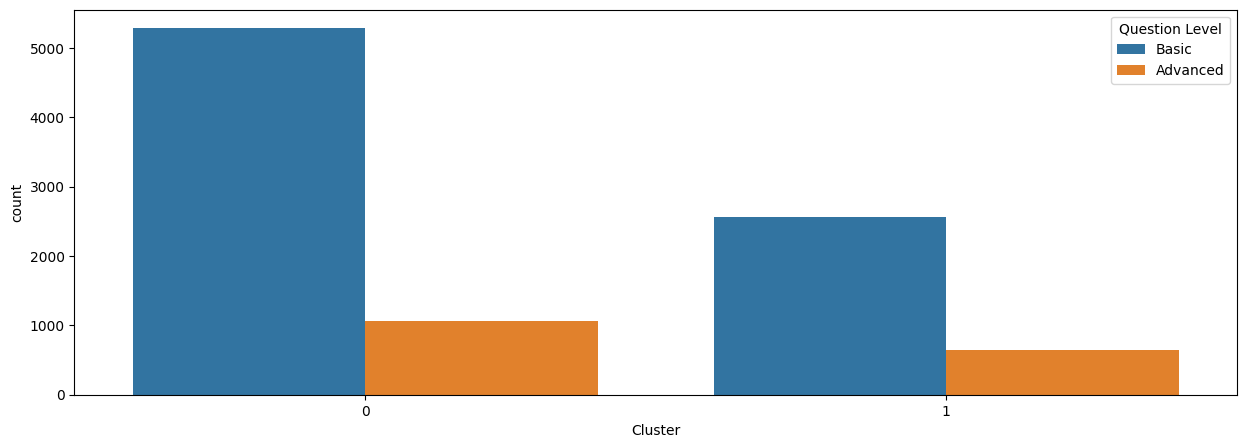

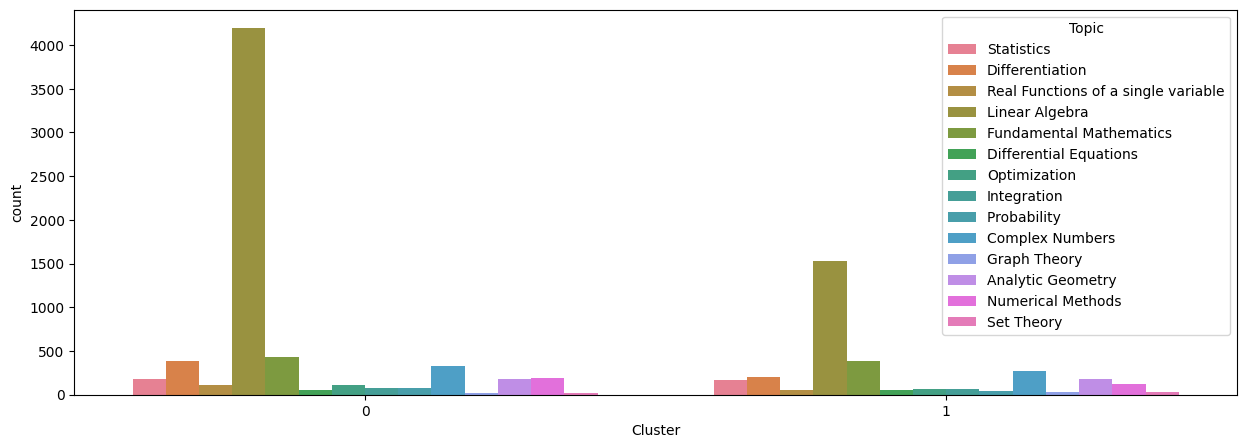

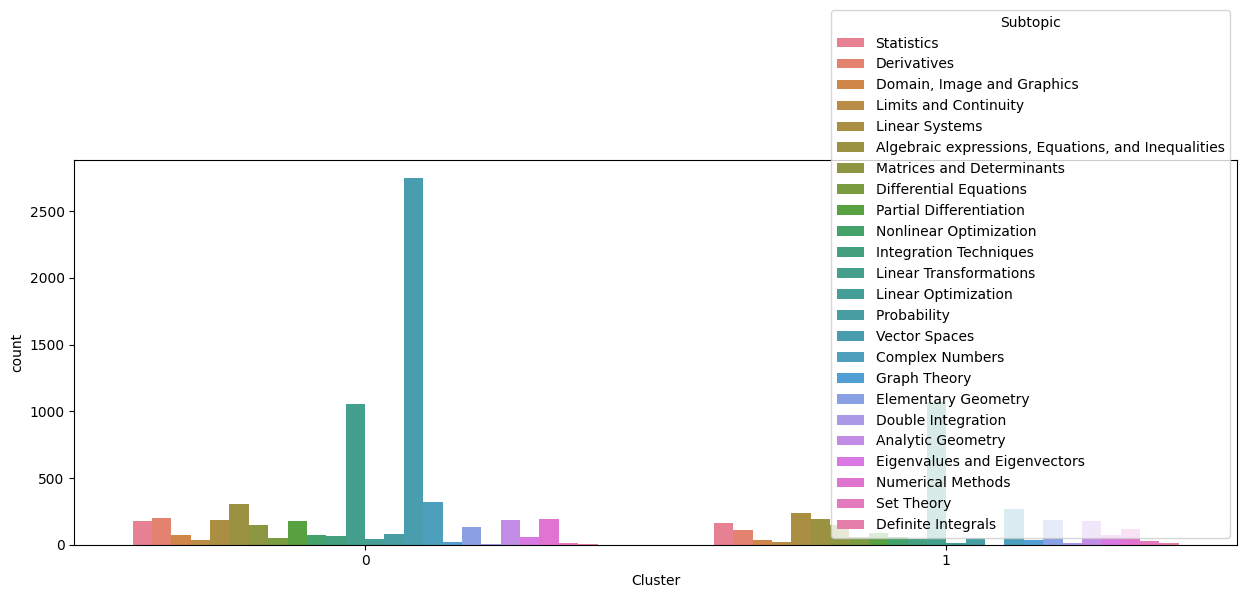

In [22]:
for col in math_mode.columns:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='Cluster',hue=col, data = math_clustered)
    plt.show()